# Primeiros passos no SQL

Treinamento de SQL básico para o 2º Data Summit Honda

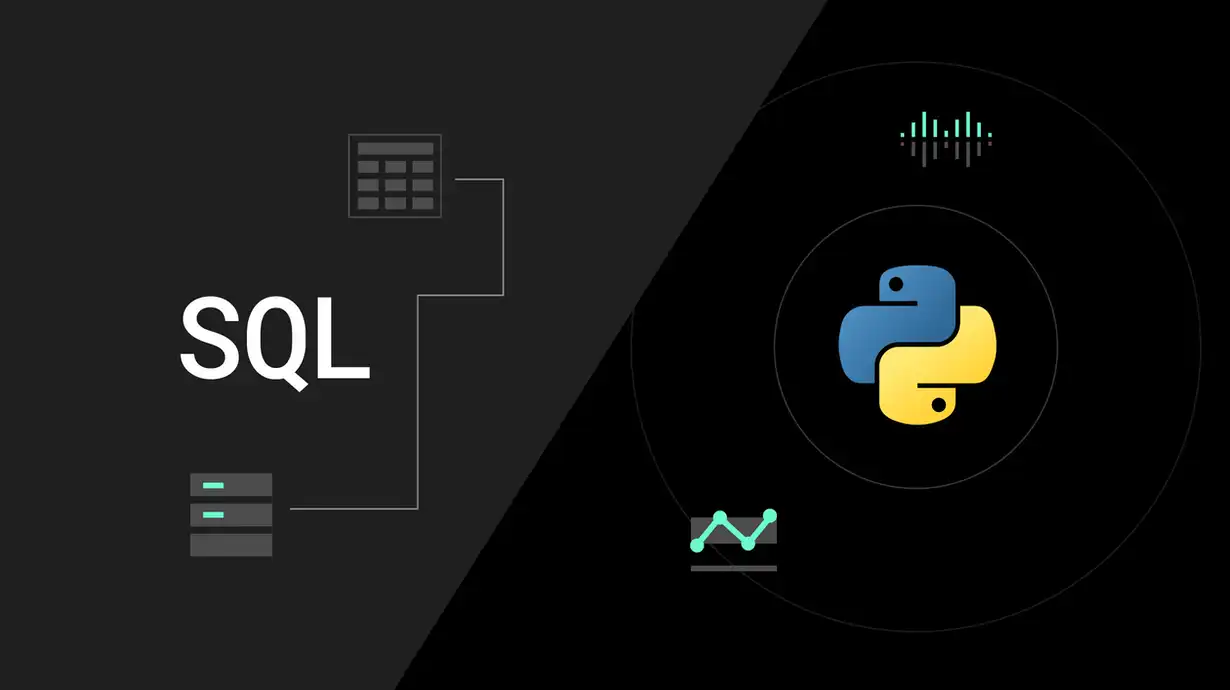

### *Instalando pacotes/bibliotecas do Python que iremos precisar*

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


### *Importando as bibliotecas*

In [3]:
import pandas as pd
import pandasql as ps
from pandasql import sqldf

### *Lendo o CSV*

Uma base que estamos lendo da internet, o repositório é do projeto do Pandas no GitHub e a base é utilizada para exercícios. \
Esta base possiu informações de valores gastos em um restaurante

In [4]:
base = ("https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/tips.csv")

### *Convertendo o CSV em um Data Frame*

In [5]:
tips = pd.read_csv(base)

# 1º Query - Verificar a quantidade de registros

In [6]:
query1 = "select count(*) as qtd_linhas from tips"

In [7]:
sqldf(query1)

,qtd_linhas
0,244


# 2º Query - Seleciona os primeiros registros

In [8]:
query2 = "select * from tips limit 10"

In [9]:
sqldf(query2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# 3º Query - Seleciona alguns campos de interesse

In [10]:
query3 = "select day, time from tips"

In [11]:
sqldf(query3)

,day,time
0,Sun,Dinner
1,Sun,Dinner
2,Sun,Dinner
3,Sun,Dinner
4,Sun,Dinner
...,...,...
239,Sat,Dinner
240,Sat,Dinner
241,Sat,Dinner
242,Sat,Dinner


# 4º Query - Seleciona alguns registros de interesse

In [12]:
query4 = "select * from tips where day = 'Sun' "

In [13]:
sqldf(query4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
71,20.90,3.50,Female,Yes,Sun,Dinner,3
72,30.46,2.00,Male,Yes,Sun,Dinner,5
73,18.15,3.50,Female,Yes,Sun,Dinner,3
74,23.10,4.00,Male,Yes,Sun,Dinner,3


# 5º Query - Seleciona o valor das menores contas

In [14]:
query5 = "select total_bill from tips order by total_bill"

In [15]:
sqldf(query5)

,total_bill
0,3.07
1,5.75
2,7.25
3,7.25
4,7.51
...,...
239,45.35
240,48.17
241,48.27
242,48.33


# 6 Query - Identifica o valor da conta de maior valor

In [16]:
query6 = "select max(total_bill) as maior_valor  from tips "

In [17]:
sqldf(query6)

,maior_valor
0,50.81


# 7º Query - Seleciona a conta de maior valor - LIMIT ou TOP

In [18]:
query7 = "select *  from tips order by total_bill desc limit 1"

In [19]:
sqldf(query7)

,total_bill,tip,sex,smoker,day,time,size
0,50.81,10.0,Male,Yes,Sat,Dinner,3


# 8º Query - Seleciona a conta de maior valor - INNER JOIN

In [33]:
query8 = "select a.*  from tips as a \
                    inner join \
                        ( \
                        select max(total_bill) as maior_conta from tips \
                        ) b \
                    on a.total_bill = b.maior_conta"

In [34]:
sqldf(query8)

,total_bill,tip,sex,smoker,day,time,size
0,50.81,10.0,Male,Yes,Sat,Dinner,3


# 7º Query - Verifica o valor total que foi gasto e a relação entre gorjeta e a conta ordenando pelo maior valor de gorjeta (proporcional)

In [54]:
query7 = "select total_bill, tip, total_bill+tip, tip/total_bill as gorjeta_vs_conta from tips order by gorjeta_vs_conta desc "

In [55]:
sqldf(query7)

,total_bill,tip,total_bill+tip,gorjeta_vs_conta
0,7.25,5.15,12.40,0.710345
1,9.60,4.00,13.60,0.416667
2,3.07,1.00,4.07,0.325733
3,11.61,3.39,15.00,0.291990
4,23.17,6.50,29.67,0.280535
...,...,...,...,...
239,30.46,2.00,32.46,0.065660
240,16.99,1.01,18.00,0.059447
241,26.41,1.50,27.91,0.056797
242,44.30,2.50,46.80,0.056433


# 8º Query - Calcular a quantidade de contas, somatória do valor da conta e valor médio das contas

In [48]:
query8 = "select sum(total_bill) as somatorio_valor_total_conta, \
                 count(*) as qtd_contas, \
                 sum(total_bill)/count(*) as valor_media_contas \
          from tips  "

In [49]:
sqldf(query8)

,somatorio_valor_total_conta,qtd_contas,valor_media_contas
0,4827.77,244,19.785943


# 9º Query - Calcular a quantidade de contas, somatória do valor da conta e valor médio das contas por sexo

In [50]:
query9 = "select sex, \
                 sum(total_bill) as somatorio_valor_total_conta, \
                 count(*) as qtd_contas, \
                 sum(total_bill)/count(*) as valor_media_contas \
        from tips  \
        group by sex"

In [51]:
sqldf(query9)

,sex,somatorio_valor_total_conta,qtd_contas,valor_media_contas
0,Female,1570.95,87,18.056897
1,Male,3256.82,157,20.744076


# 10º Query - Calcular o valor médio das contas e proporção da gorjeta por sexo e fumante

In [58]:
query10 = "select sex, smoker,\
                 avg(total_bill) as media_valor_total_conta, \
                 avg(tip/total_bill) as media_proposrcao_gorgeta_conta\
        from tips  \
        group by sex, smoker"

In [59]:
sqldf(query10)

,sex,smoker,media_valor_total_conta,media_proposrcao_gorgeta_conta
0,Female,No,18.105185,0.156921
1,Female,Yes,17.977879,0.182150
2,Male,No,19.791237,0.160669
3,Male,Yes,22.284500,0.152771


# 11º Query - Calcular o valor médio das contas e a proporção da gorjeta por tamanho da mesa

In [62]:
query11 = "select size,\
                 avg(total_bill) as media_valor_total_conta, \
                 avg(tip/total_bill) as media_proposrcao_gorgeta_conta\
        from tips  \
        group by size"

In [63]:
sqldf(query11)

,size,media_valor_total_conta,media_proposrcao_gorgeta_conta
0,1,7.242500,0.217292
1,2,16.448013,0.165719
2,3,23.277632,0.152157
3,4,28.613514,0.145949
4,5,30.068000,0.141495
5,6,34.830000,0.156229


# 12º Query - Calcular o tamanho medio da mesa, valor médio da conta e proporção da gorjeta por dia e período

In [64]:
query12 = "select day, time, \
            avg(size) as tamanho_medio_mesa,\
            avg(total_bill) as media_valor_total_conta, \
            avg(tip/total_bill) as media_proposrcao_gorgeta_conta\
        from tips  \
        group by day, time"

In [65]:
sqldf(query12)

,day,time,tamanho_medio_mesa,media_valor_total_conta,media_proposrcao_gorgeta_conta
0,Fri,Dinner,2.166667,19.663333,0.158916
1,Fri,Lunch,2.000000,12.845714,0.188765
2,Sat,Dinner,2.517241,20.441379,0.153152
3,Sun,Dinner,2.842105,21.410000,0.166897
4,Thur,Dinner,2.000000,18.780000,0.159744
5,Thur,Lunch,2.459016,17.664754,0.161301


# 13º Query - Comparação do valor da conta com a media do valor para o mesmo dia e período

In [68]:
query13 = "select a.*, b.media_valor_total_conta from tips a \
            left join \
                ( \
                select day, time, \
                avg(total_bill) as media_valor_total_conta \
                from tips  \
                group by day, time \
                ) b\
             on a.day = b.day and a.time = b.time "

In [69]:
sqldf(query13)

,total_bill,tip,sex,smoker,day,time,size,media_valor_total_conta
0,16.99,1.01,Female,No,Sun,Dinner,2,21.410000
1,10.34,1.66,Male,No,Sun,Dinner,3,21.410000
2,21.01,3.50,Male,No,Sun,Dinner,3,21.410000
3,23.68,3.31,Male,No,Sun,Dinner,2,21.410000
4,24.59,3.61,Female,No,Sun,Dinner,4,21.410000
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.441379
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.441379
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.441379
242,17.82,1.75,Male,No,Sat,Dinner,2,20.441379


# 14º Query - Comparação do valor da conta com a media do valor para o mesmo tipo de conta

In [71]:
query14 = "select a.*, b.media_valor_total_conta from tips a \
            left join \
                ( \
                select sex, smoker, day, time, size, \
                avg(total_bill) as media_valor_total_conta \
                from tips  \
                group by sex, smoker, day, time, size \
                ) b \
         on  a.sex = b.sex        and \
             a.smoker = b.smoker  and \
             a.day = b.day        and \
             a.time = b.time      and \
             a.size = b.size  "

In [72]:
sqldf(query14)

,total_bill,tip,sex,smoker,day,time,size,media_valor_total_conta
0,16.99,1.01,Female,No,Sun,Dinner,2,14.562000
1,10.34,1.66,Male,No,Sun,Dinner,3,22.291429
2,21.01,3.50,Male,No,Sun,Dinner,3,22.291429
3,23.68,3.31,Male,No,Sun,Dinner,2,15.887727
4,24.59,3.61,Female,No,Sun,Dinner,4,29.915000
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,21.524444
240,27.18,2.00,Female,Yes,Sat,Dinner,2,18.029091
241,22.67,2.00,Male,Yes,Sat,Dinner,2,17.258235
242,17.82,1.75,Male,No,Sat,Dinner,2,14.787059


# 15º Query - Selecionando as contas que gastaram menos de 50% da média

In [81]:
query15 = "select a.*, b.media_valor_total_conta, \
            a.total_bill/b.media_valor_total_conta as total_vs_media \
            from tips a \
            left join \
                ( \
                select sex, smoker, day, time, size, \
                avg(total_bill) as media_valor_total_conta \
                from tips  \
                group by sex, smoker, day, time, size \
                ) b\
         on  a.sex = b.sex        and \
             a.smoker = b.smoker  and \
             a.day = b.day        and \
             a.time = b.time      and \
             a.size = b.size  \
        where a.total_bill/b.media_valor_total_conta < 0.5 "

In [82]:
sqldf(query15)

,total_bill,tip,sex,smoker,day,time,size,media_valor_total_conta,total_vs_media
0,10.34,1.66,Male,No,Sun,Dinner,3,22.291429,0.463855
1,5.75,1.00,Female,Yes,Fri,Dinner,2,12.200000,0.471311
2,7.51,2.00,Male,No,Thur,Lunch,2,15.263750,0.492015
3,7.25,5.15,Male,Yes,Sun,Dinner,2,23.539000,0.307999
4,7.56,1.44,Male,No,Thur,Lunch,2,15.263750,0.495291
5,7.74,1.44,Male,Yes,Sat,Dinner,2,17.258235,0.448482


# 16º Query - Verificando a quantidade e selecionando as contas com valor total da conta menor do que 10

In [97]:
query16a = "select count(*) from tips  where total_bill < 10"

In [98]:
sqldf(query16a)

,count(*)
0,17


In [99]:
query16b = "select * from tips  where total_bill < 10"

In [100]:
sqldf(query16b)

,total_bill,tip,sex,smoker,day,time,size
0,8.77,2.00,Male,No,Sun,Dinner,2
1,9.55,1.45,Male,No,Sat,Dinner,2
2,9.68,1.32,Male,No,Sun,Dinner,2
3,9.94,1.56,Male,No,Sun,Dinner,2
4,3.07,1.00,Female,Yes,Sat,Dinner,1
5,5.75,1.00,Female,Yes,Fri,Dinner,2
6,7.25,1.00,Female,No,Sat,Dinner,1
7,8.52,1.48,Male,No,Thur,Lunch,2
8,8.51,1.25,Female,No,Thur,Lunch,2
9,8.35,1.50,Female,No,Thur,Lunch,2


# 17º Query - Verificando os tipos de contas que juntas ficaram com valor total menor do que 10

In [101]:
query17 = "select sex, smoker, day, time, size, \
                count(*) as qtd_contas, \
                sum(total_bill) as total_conta \
            from tips  \
            group by sex, smoker, day, time, size \
            having total_conta < 10"

In [102]:
sqldf(query17)

,sex,smoker,day,time,size,qtd_contas,total_conta
0,Female,No,Sat,Dinner,1,1,7.25
1,Female,Yes,Sat,Dinner,1,1,3.07
2,Male,Yes,Fri,Lunch,1,1,8.58


# Referências

https://www.tutorialspoint.com/sqlite/sqlite_having_clause.htm \
https://www.w3schools.com/sql/default.asp \
https://towardsdatascience.com/anomaly-detection-in-sql-2bcd8648f7a8 \
https://towardsdatascience.com/10-sql-operations-for-80-of-your-data-manipulation-7461c56e25f4 \
https://medium.com/codex/write-your-sql-queries-the-right-way-9c04dfbb6499 \
https://towardsdatascience.com/uber-sql-interview-questions-cf6a2a08a23c 
